# MSiA-420 Project
## In-vehicle Coupon Recommendation Dataset

## 0. Project Scope:
<p>
blahblahbalbhalbblah
</p>

## 1. About Dataset

| Variable name | Variable| Explanation|
|----------|------------|--------------|
|destination| No Urgent Place, Home, Work|
|passanger| Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)|
|weather| Sunny, Rainy, Snowy|
|temperature|55, 80, 30|
|time| 2PM, 10AM, 6PM, 7AM, 10PM|
|coupon| Restaurant(<$20), Coffee House, Carry out & Take away, Bar, Restaurant($20-$50)|
|expiration| 1d, 2h (the coupon expires in 1 day or in 2 hours)|
|gender| Female, Male|
|age| 21, 46, 26, 31, 41, 50plus, 36, below21|
|maritalStatus| Unmarried partner, Single, Married partner, Divorced, Widowed|
|has_Children|1, 0|
|education| Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
|occupation| Unemployed, Architecture & Engineering, Student,Education&Training&Library, Healthcare Support,Healthcare Practitioners & Technical, Sales & Related, Management,Arts Design Entertainment Sports & Media, Computer & Mathematical,Life Physical Social Science, Personal Care & Service,Community & Social Services, Office & Administrative Support,Construction & Extraction, Legal, Retired,Installation Maintenance & Repair, Transportation & Material Moving,Business & Financial, Protective Service,Food Preparation & Serving Related, Production Occupations,Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry|
|income| $37500 - $49999, $62500 - $74999, $12500 - $24999, $75000 - $87499, $50000 - $62499, $25000 - $37499, $100000 or More, $87500 - $99999, Less than $12500|
|Bar| never, less1, 1~3, gt8, nan4~8 | how many times do you go to a bar every month?)|
|CoffeeHouse| never, less1, 4~8, 1~3, gt8, nan | how many times do you go to a coffeehouse every month?)|
|CarryAway|n4~8, 1~3, gt8, less1, never | how many times do you get take-away food every month?)|
|RestaurantLessThan20| 4~8, 1~3, less1, gt8, never | how many times do you go to a restaurant with an average expense per person of less than $20 every month?)|
|Restaurant20To50| 1~3, less1, never, gt8, 4~8, nan | how many times do you go to a restaurant with average expense per person of $20 - $50 every month?)|
|toCoupon_GEQ5min|0,1|driving distance to the restaurant/bar for using the coupon is greater than 5 minutes|
|toCoupon_GEQ15min|0,1 | driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)|
|toCoupon_GEQ25min|0, 1 | driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)|
|direction_same|0, 1 | whether the restaurant/bar is in the same direction as your current destination)|
|direction_opp|1, 0 | whether the restaurant/bar is in the same direction as your current destination)|
|Y|1, 0 (whether the coupon is accepted)|


## 2. EDA
### 2.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### 2.1 Import dataset

In [2]:
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


### Overall data quality and description

In [3]:
df['temperature'] = df['temperature'].astype(object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  object
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

some columns have null values </br>
most are categorical except ```temperature``` , ```has_children``` , ```direction_opp```, ```Y (response variable)``` </br>
```direction_opp```, ```has_children``` is boolean


In [5]:
# percentage of null values
round(df.isnull().sum()/ len(df)*100,2)

destination              0.00
passanger                0.00
weather                  0.00
temperature              0.00
time                     0.00
coupon                   0.00
expiration               0.00
gender                   0.00
age                      0.00
maritalStatus            0.00
has_children             0.00
education                0.00
occupation               0.00
income                   0.00
car                     99.15
Bar                      0.84
CoffeeHouse              1.71
CarryAway                1.19
RestaurantLessThan20     1.02
Restaurant20To50         1.49
toCoupon_GEQ5min         0.00
toCoupon_GEQ15min        0.00
toCoupon_GEQ25min        0.00
direction_same           0.00
direction_opp            0.00
Y                        0.00
dtype: float64

columns ```car```, ```bar```, ```CoffeeHouse```, ```CarryAway```, ```RestaurantLessThan20```, ```Restaurant20To50``` have null values</br>
concern: ~99% ```car``` is Null

In [6]:
df['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [7]:
df.nunique() # basically all variables are categorical since integer values are not continuous

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

### check class imbalance for response variable

(0.4315673289183223, 0.5684326710816777)

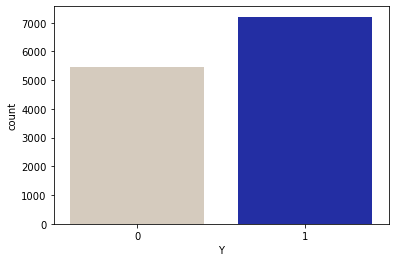

In [8]:
sns.countplot(x=df['Y'],palette=['#D9CBBA','#0E1CB8'])
len(df[df['Y'] == 0])/len(df),len(df[df['Y'] == 1])/len(df)

### check overall trend in response to response variable

In [9]:
df = df.astype(object)
long_cols = ['coupon','occupation','education','maritalStatus', 'income','car']
cols = [i for i in df.columns if i not in long_cols and i != 'Y']

ConversionError: Failed to convert value(s) to axis units: 0        never
1        never
2        never
3        never
4        never
         ...  
12679    never
12680    never
12681    never
12682    never
12683    never
Name: x, Length: 12684, dtype: object

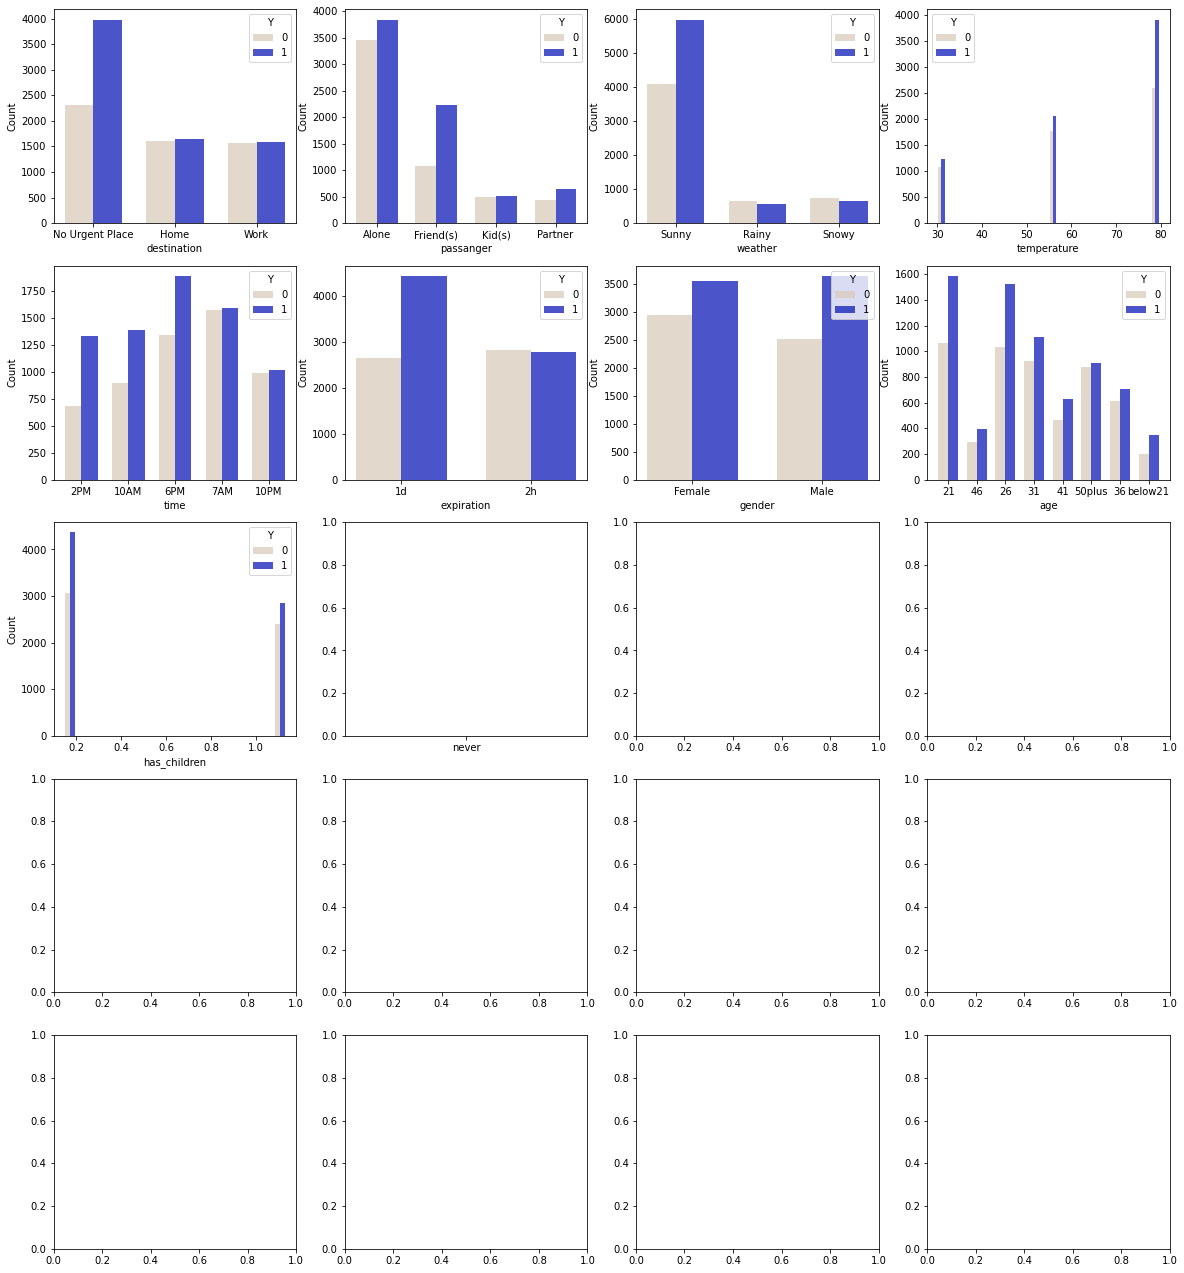

In [11]:
fig, ax = plt.subplots(math.ceil(len(cols)/4), 4, figsize=(20,1.2*len(cols)))
for i in range(len(cols)):
        q, mod = divmod(i,4)
        sns.histplot(df,x=cols[i],hue='Y',multiple="dodge",shrink=0.7,palette=['#D9CBBA','#0E1CB8'], edgecolor=None, ax=ax[q,mod])
plt.tight_layout()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

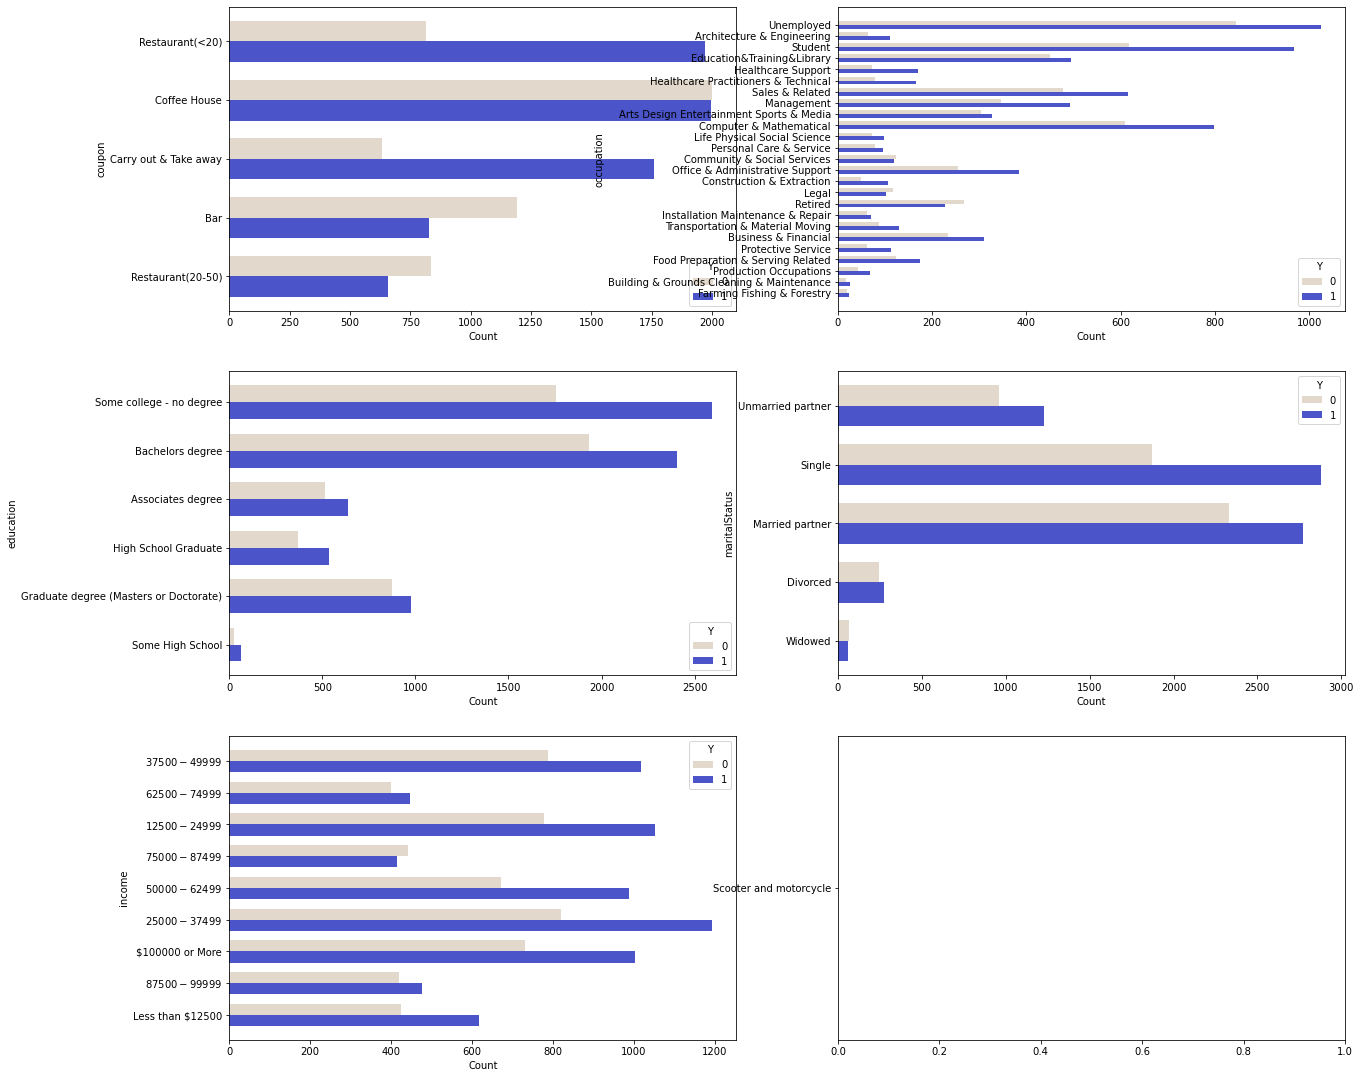

In [12]:
fig, ax = plt.subplots(math.ceil(len(long_cols)/2), 2, figsize=(20,1*len(cols)))
for i in range(len(long_cols)):
        q, mod = divmod(i,2)
        sns.histplot(df,y=long_cols[i],hue='Y',multiple="dodge",shrink=0.7,palette=['#D9CBBA','#0E1CB8'], edgecolor=None, ax=ax[q,mod])
plt.tight_layout()

## Various Data Cleaning

Impute</br>
1. mode
2. nan -> negative

--> cols with nan values : car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50

Data Types </br>
1. all categorical
2. categorical + ordinal

--> ordinal : temperature, time, expiration, age, income, CarryAway, [RestaurantLessThan20 + Restaurant20To50], [toCoupon_GEQ5min + toCoupon_GEQ15min + toCoupon_GEQ25min]



In [13]:
def fillnull(col):
    col.fillna(col.value_counts().index[0], inplace=True)
    return col

df1 = df.copy() # mode / all categorical
df2 = df.copy() # mode / cate + ordinal
df3 = df.copy() # nan / all categorical
df4 = df.copy() # nan / cate + ordinal --> not possible SO

df1=df1.apply(lambda col:fillnull(col))
df2=df2.apply(lambda col:fillnull(col))

In [14]:
ohe_col = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp']

df1 = pd.concat([df1['Y'], pd.get_dummies(df1[ohe_col])],axis=1) #finished
df3 = pd.concat([df3['Y'], pd.get_dummies(df3[ohe_col],dummy_na=True)],axis=1) # finished

In [15]:
ord_col = ["temperature", "time", "expiration", "age", "income", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]
temp = {30:0, 50:1, 80:2}
time = {'7AM':0, "10AM":1, "2PM":2, "6PM":3, "10PM":4}
exp = {"1d":0, "2h":1 }
age = {"below21":0, "21":1, "26":2, "31":3, "36":4, "41":5, "46":6, "50plus":7 }
inc = {'Less than $12500':0,'$12500 - $24999':1,'$25000 - $37499':2,'$37500 - $49999':3, '$50000 - $62499':4, '$62500 - $74999':5,'$75000 - $87499':6,'$87500 - $99999':7,'$100000 or More':8}
ca = {'never':0 ,'less1':1, '1~3':2, '4~8':3, 'gt8':4}
restless20 = {'never': 0, 'less1':1, '1~3':2, '4~8':3, 'gt8':4}
rest20to50 = {'never':0, 'less1':1, '1~3': 2, '4~8':3, 'gt8':4}

ord_repl = [temp, time, exp, age, inc, ca, restless20, rest20to50]

In [16]:
#  <5 , 5-15, 15-25, >25
df2['toCoupon_GEQ'] = np.where(((df2.toCoupon_GEQ5min==0) & (df2.toCoupon_GEQ15min==0) & (df2.toCoupon_GEQ25min==0)), 0, \
                     np.where(((df2.toCoupon_GEQ5min==1) & (df2.toCoupon_GEQ15min==0) & (df2.toCoupon_GEQ25min==0)), 1, \
                     np.where(((df2.toCoupon_GEQ5min==1) & (df2.toCoupon_GEQ15min==1) & (df2.toCoupon_GEQ25min==0)), 2, \
                     np.where(((df2.toCoupon_GEQ5min==1) & (df2.toCoupon_GEQ15min==1) & (df2.toCoupon_GEQ25min==1)), 3, None))))

In [17]:
for i in range(len(ord_col)):
    df2[ord_col[i]].replace(ord_repl[i],inplace=True) #finished

In [18]:
df1

,Y,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_Home,destination_No Urgent Place,...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,1,55,1,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
1,0,80,1,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
2,1,80,1,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
3,0,80,1,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,80,1,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,55,0,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
12680,1,55,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
12681,0,30,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
12682,0,30,0,1,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [19]:
df2

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,toCoupon_GEQ
0,No Urgent Place,Alone,Sunny,55,2,Restaurant(<20),0,Female,1,Unmarried partner,...,2,3,2,1,0,0,0,1,1,1
1,No Urgent Place,Friend(s),Sunny,2,1,Coffee House,1,Female,1,Unmarried partner,...,2,3,2,1,0,0,0,1,0,1
2,No Urgent Place,Friend(s),Sunny,2,1,Carry out & Take away,1,Female,1,Unmarried partner,...,2,3,2,1,1,0,0,1,1,2
3,No Urgent Place,Friend(s),Sunny,2,2,Coffee House,1,Female,1,Unmarried partner,...,2,3,2,1,1,0,0,1,0,2
4,No Urgent Place,Friend(s),Sunny,2,2,Coffee House,0,Female,1,Unmarried partner,...,2,3,2,1,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,3,Carry out & Take away,0,Male,2,Single,...,2,3,2,1,0,0,1,0,1,1
12680,Work,Alone,Rainy,55,0,Carry out & Take away,0,Male,2,Single,...,2,3,2,1,0,0,0,1,1,1
12681,Work,Alone,Snowy,0,0,Coffee House,0,Male,2,Single,...,2,3,2,1,0,0,1,0,0,1
12682,Work,Alone,Snowy,0,0,Bar,0,Male,2,Single,...,2,3,2,1,1,1,0,1,0,3


In [20]:
df3

,Y,destination_Home,destination_No Urgent Place,destination_Work,destination_nan,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,passanger_nan,...,toCoupon_GEQ15min_nan,toCoupon_GEQ25min_0.0,toCoupon_GEQ25min_1.0,toCoupon_GEQ25min_nan,direction_same_0.0,direction_same_1.0,direction_same_nan,direction_opp_0.0,direction_opp_1.0,direction_opp_nan
0,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
12680,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
12681,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
12682,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [24]:
df1.to_csv("mode_allcat.csv", index=False)

In [25]:
df2.to_csv("mode_ordinal.csv", index=False)

In [26]:
df3.to_csv("nan_allcat.csv", index=False)